<p style="text-align:center;">
<img src="https://github.com/xRiyaPathak/Forest-Forecasters/blob/main/Swan_Teleco.png?raw=true"
     alt="DigitalFuturesLogo"
    width="250" height="250"
     style="float: center; margin-right: 10px;" />
</p>

**<h1 style="text-align: center;">**Swan Teleco**</h1>**
**<h2 style="text-align: center;">Customer Churn</h2>**
**<h3 style="text-align: center;">Forest Forecasters</h3>**
**<h4 style="text-align: center;">Andrew, Hasan, Natalie, Riya</h4>**
**<h5 style="text-align: left;">28-02-2024</h5>**

#### **Document 1**

# 1. Swan

In [1]:
# Import the required libraries!
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools 

In [2]:
# Setting display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
# Read the source file and check few rows
df = pd.read_excel('swan.xlsx')
#df = pd.read_excel('1 - Project Data.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


# 2. Data Checks

In [4]:
# Check the null values for all the columns
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [5]:
# Checking the number of rows and columns
df.shape

(7043, 31)

In [6]:
# Checking the columns in the dataset
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [7]:
# Check the data types of all the columns
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [8]:
# Checking the unique values for all the columns

for column in df.columns:
    unique_value = df[column].unique()
    print(f"Unique values in '{column}': {unique_value}")

Unique values in 'CustomerID': ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Unique values in 'Count': [1]
Unique values in 'Country': ['United States']
Unique values in 'State': ['California']
Unique values in 'City': ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Unique values in 'Zip Code': [90003 90005 90006 ... 96128 96134 96146]
Unique values in 'Lat Long': ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Unique values in 'Latitude': [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Unique values in 'Longitude': [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Senior Citizen': ['No' 'Yes']
Unique values in 'Partner': ['No' 'Yes']
Unique values in 'Dependents': ['No' 'Yes']
Unique va

In [9]:
# Checking the unique values for all the columns
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [10]:
# Checking the unique values for 'Churn Reason' column
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [11]:
## How many customers churned v.s not churned?
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [12]:
# Checking the customers who have not churned
filter_condition = (df['Churn Value'] == 0)

nonchurn_data = df.loc[filter_condition, :]
nonchurn_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [13]:
# Checking the customers who have churned
filter_condition = (df['Churn Value'] == 1)

churn_data = df.loc[filter_condition, :]
churn_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [14]:
# Count for the Churn Reason

unique_value_counts = df['Churn Reason'].value_counts()
unique_value_counts

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [15]:
# This is df with all the customers who have not yet churned

df_nonchurners = df[df['Churn Reason'].isnull()].copy()
df_nonchurners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [16]:
# Shape of df containing customers not churned yet!
df_nonchurners.shape

# Original dataset (7043, 31)

(5174, 31)

In [17]:
# This is df with all the customers who have churned

df_churners = df[df["Churn Value"] == 1]
df_churners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [18]:
# Shape of df containing customers not churned yet!
df_churners.shape
# Original dataset (7043, 31)

(1869, 31)

#### Box plot to analyse the Tenure Months

This is done to check the distribution of the tenure months to see if there are outliers and if we may need to scale the values

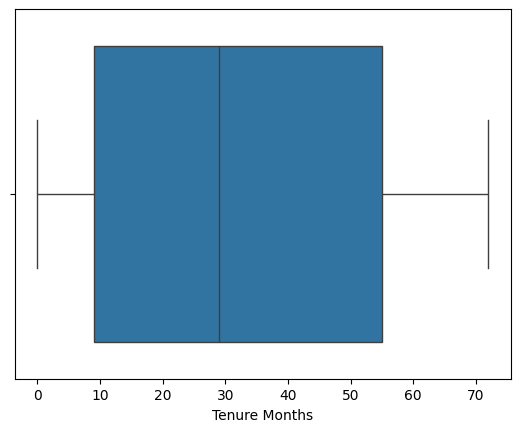

In [19]:
sns.boxplot(data = df, x= 'Tenure Months')
plt.show()

This distribution is well behaved with no outliers, therefore scaling is not necessarily needed

#### Box plot to analyse the Monthly Charges

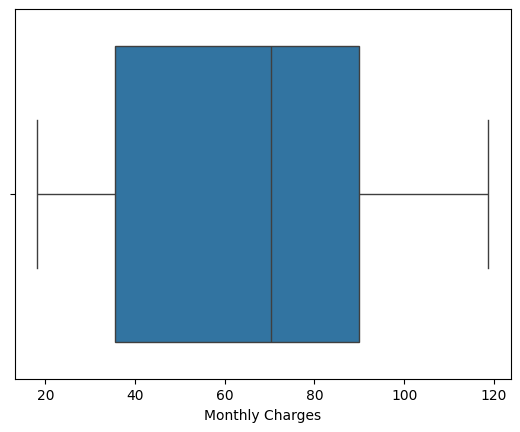

In [20]:
sns.boxplot(data = df, x = 'Monthly Charges')
plt.show()

Again, the monthly charges have a well behaved distribution

# 3. Checking for Nulls!

In [21]:
# checking for the missing values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [22]:
# To fill the null values for customers who did not churn yet
df['Churn Reason'] = df['Churn Reason'].fillna('Not Churned')

In [23]:
# checking for the missing values
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Reason         0
dtype: int64

# 4. EDA

## Looking into the key demographics of customers

### --Gender distribution of all the customers

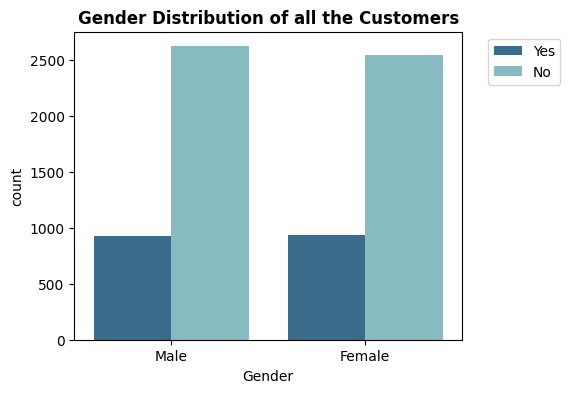

In [24]:
plt.figure(figsize=(5,4), dpi=100)

# Set color palette
sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Gender", hue="Churn Label", data=df)

# Add title
plt.title("Gender Distribution of all the Customers", fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.05,1))

# Show plot
plt.show()

### --Gender distribution of the customers who have churned 

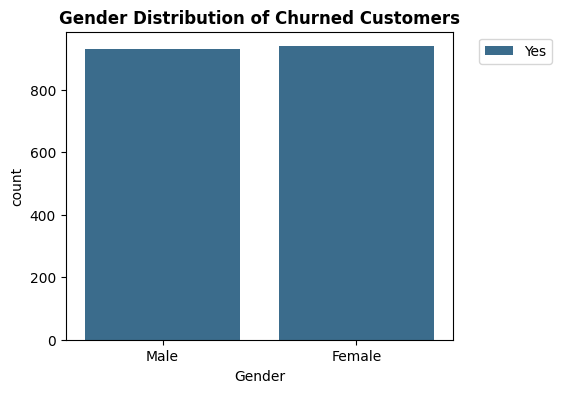

In [25]:
plt.figure(figsize=(5,4), dpi=100)

# Set color palette
sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Gender", hue="Churn Label", data=df_churners)

# Add title
plt.title("Gender Distribution of Churned Customers", fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.05,1))

# Show plot
plt.show()

### --Age distribution of all the customers

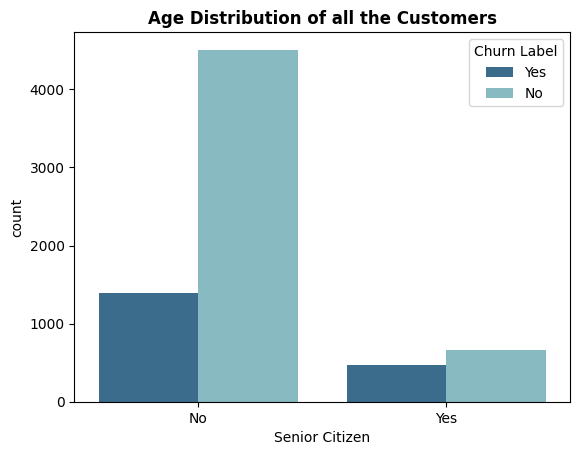

In [26]:
# Set color palette
sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Senior Citizen", hue="Churn Label", data=df)

# Add title
plt.title("Age Distribution of all the Customers", fontweight="bold")

# Show plot
plt.show()

### --Age distribution of customers who have churned

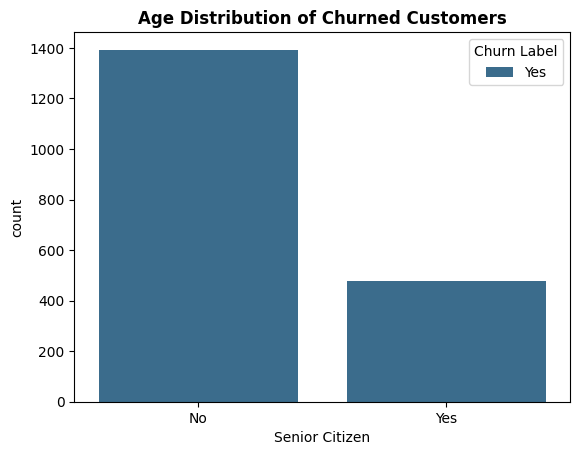

In [27]:
# Set color palette
sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Senior Citizen", hue="Churn Label", data=df_churners)

# Add title
plt.title("Age Distribution of Churned Customers", fontweight="bold")

# Show plot
plt.show()

### --Family makeup of all the customers

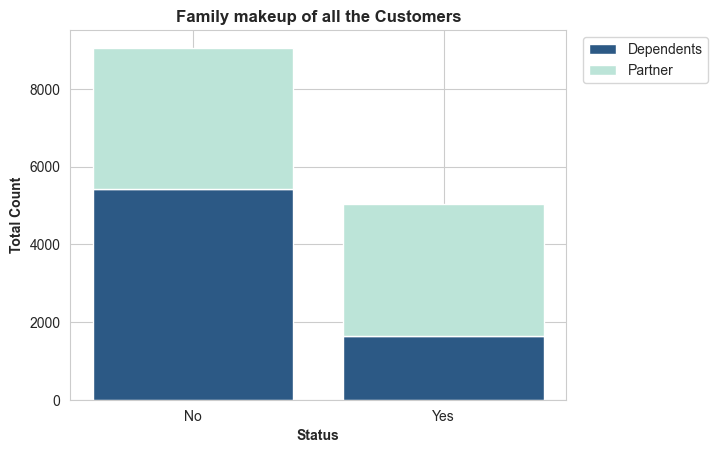

In [31]:
# Graph to show the family makeup of the Customers
colors = ['#2C5985',  '#BCE4D8']

dependents = df["Dependents"].value_counts()
partner = df["Partner"].value_counts()

fig, ax = plt.subplots()
ax.bar(dependents.index, dependents.values, label="Dependents", color=colors[0])
ax.bar(partner.index, partner.values, bottom=dependents.values, label="Partner", color=colors[1])
ax.set_title("Family makeup of all the Customers",fontweight="bold")
ax.set_xlabel("Status",fontweight="bold")
ax.set_ylabel("Total Count",fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.30,1))

plt.show()

### --Family makeup of customers who have churned

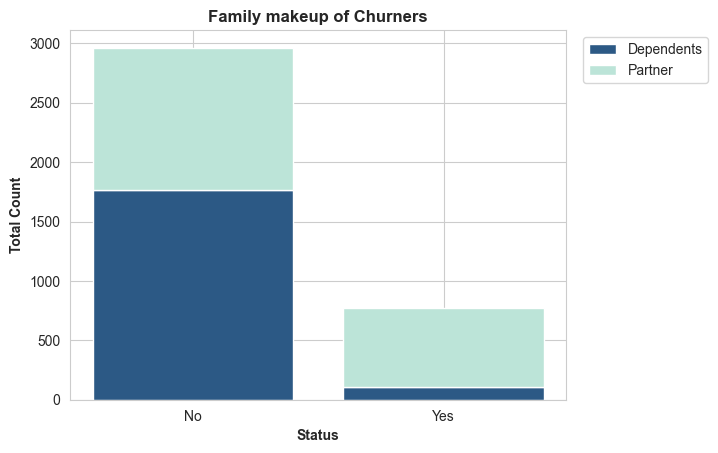

In [32]:
# Graph to show the family makeup of the Churners
colors = ['#2C5985',  '#BCE4D8' ]
dependents = df_churners["Dependents"].value_counts()
partner = df_churners["Partner"].value_counts()

fig, ax = plt.subplots()
ax.bar(dependents.index, dependents.values, label="Dependents", color=colors[0])
ax.bar(partner.index, partner.values, bottom=dependents.values, label="Partner", color=colors[1])
ax.set_title("Family makeup of Churners",fontweight="bold")
ax.set_xlabel("Status",fontweight="bold")
ax.set_ylabel("Total Count",fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.30,1))

plt.show()

## Looking at why customers have churned

### --Reasons for Churning

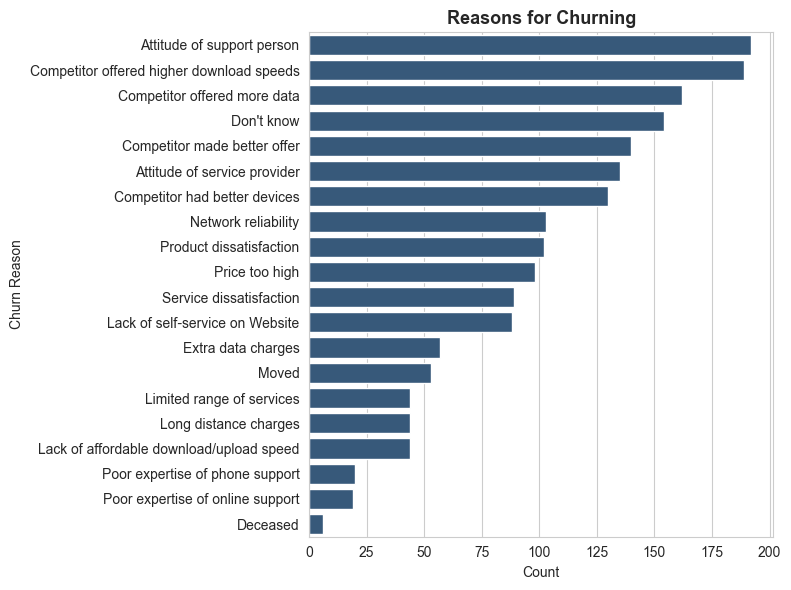

In [28]:
# Graph to show the reasons for Churning
sns.set_style("whitegrid")
sns.set_palette(['#2C5985',  '#347EA1', '#4BA5BA', '#7EC1CA', '#89C8CC', '#95CECF', '#A1D5D2' ,'#AEDCD5','#BCE4D8' ])
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting a countplot
sns.countplot(y="Churn Reason", data=df_churners, order=df_churners["Churn Reason"].value_counts().index, ax=ax)
ax.set_xlabel("Count")
ax.set_ylabel("Churn Reason")
ax.set_title("Reasons for Churning", fontweight="bold", fontsize=13)

plt.tight_layout()
plt.show()

## Looking for any link between services used by customers, the types of customers and whether or not they have churned

### --Services used by all the Customers

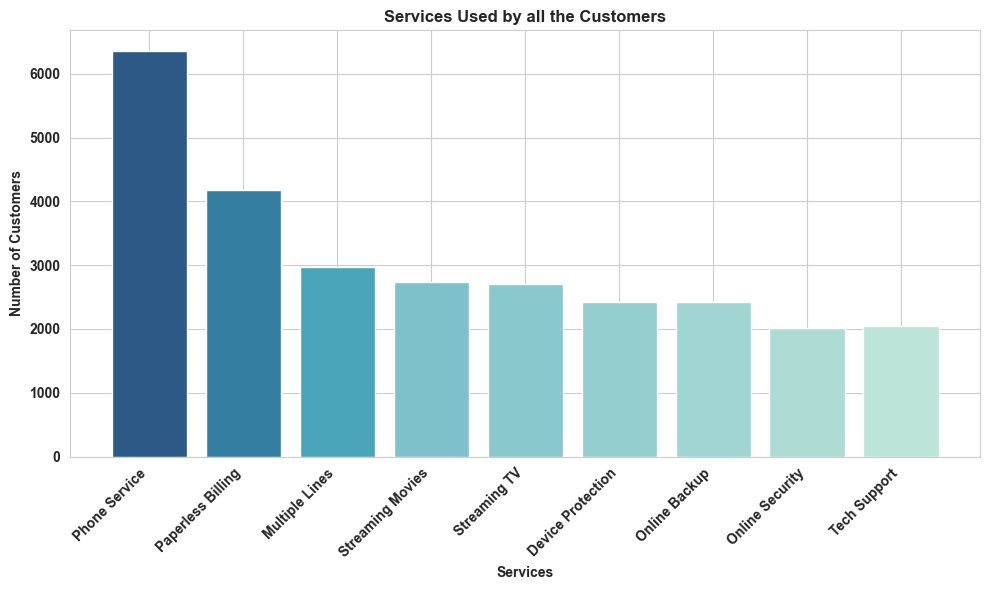

In [29]:
# Garph to show the Services used by the all the Customers
colors = ['#2C5985',  '#347EA1', '#4BA5BA', '#7EC1CA', '#89C8CC', '#95CECF', '#A1D5D2' ,'#AEDCD5','#BCE4D8' ]

services = ['Phone Service', 'Paperless Billing','Multiple Lines', 'Streaming Movies','Streaming TV',  'Device Protection', 'Online Backup',  'Online Security', 'Tech Support']
services_counts = [df[df[services] == 'Yes'].shape[0] for services in services]

plt.figure(figsize=(10, 6))
plt.bar(services, services_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(rotation=45, ha='right',fontweight="bold")
plt.xlabel('Services',fontweight="bold")
plt.ylabel('Number of Customers',fontweight="bold")
plt.title('Services Used by all the Customers',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



### --Services used by the Churners

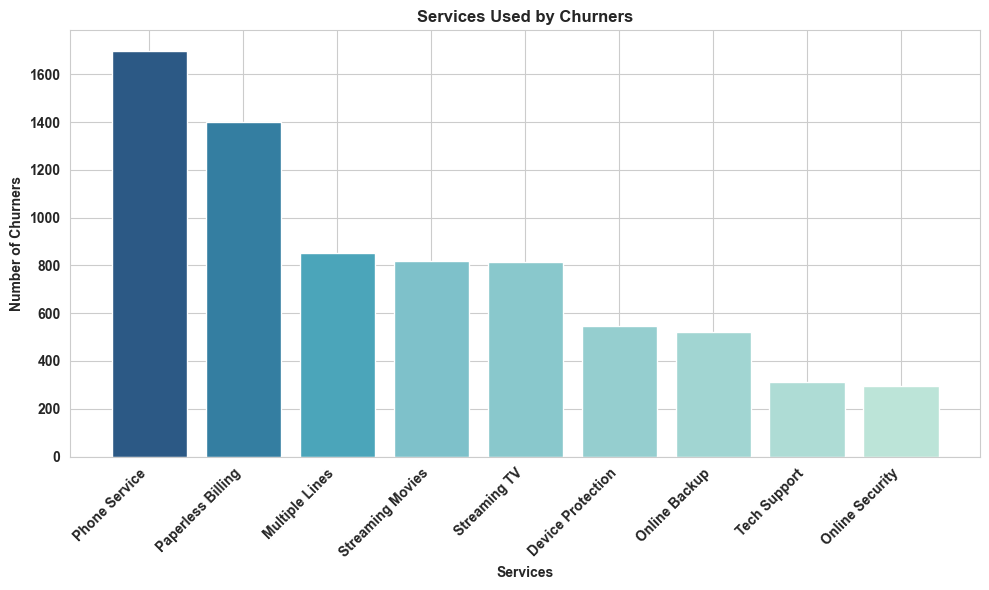

In [30]:
# Garph to show the Services used by the Churners
colors = ['#2C5985',  '#347EA1', '#4BA5BA', '#7EC1CA', '#89C8CC', '#95CECF', '#A1D5D2' ,'#AEDCD5','#BCE4D8' ]

services = ['Phone Service', 'Paperless Billing','Multiple Lines', 'Streaming Movies','Streaming TV',  'Device Protection', 'Online Backup', 'Tech Support',  'Online Security']
services_counts = [df_churners[df_churners[services] == 'Yes'].shape[0] for services in services]

plt.figure(figsize=(10, 6))
plt.bar(services, services_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(rotation=45, ha='right',fontweight="bold")
plt.xlabel('Services',fontweight="bold")
plt.ylabel('Number of Churners',fontweight="bold")
plt.title('Services Used by Churners',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



### --Types of Customers who churned

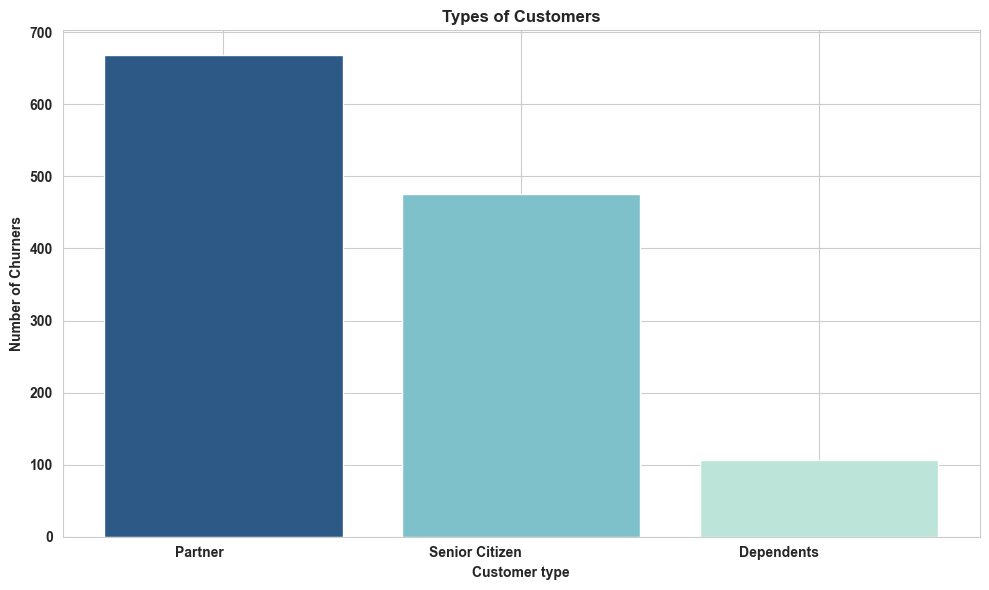

In [34]:
# Customer types who churned
colors = ['#2C5985',  '#7EC1CA','#BCE4D8' ]

cust = [ 'Partner', 'Senior Citizen','Dependents']
cust_counts = [df_churners[df_churners[cust] == 'Yes'].shape[0] for cust in cust]

plt.figure(figsize=(10, 6))
plt.bar(cust, cust_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(ha='right',fontweight="bold")
plt.xlabel('Customer type',fontweight="bold")
plt.ylabel('Number of Churners',fontweight="bold")
plt.title('Types of Customers',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



## Correlations of all the numeric columns

#### To understand what columns may be contributing towards customers churning

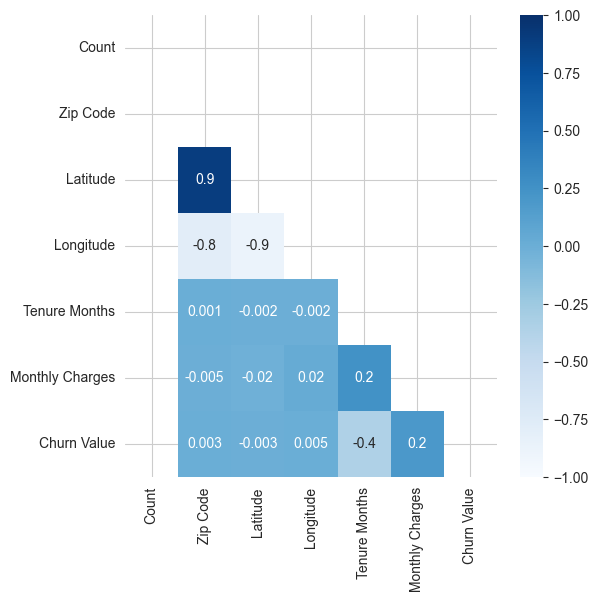

In [33]:
# Heatmap to show the correlation of the numeric columns
plt.figure(figsize=(6,6), dpi=100)

sns.heatmap(df.corr(numeric_only=True),
           annot=True,
           cmap='Blues',
           vmin=-1,
           vmax=1,
           fmt='.1',
           mask=np.triu(df.corr(numeric_only=True)))

plt.show()

We see that tenure months and churn value are negatively correlated meaning the longer the tenure, the less number of churners

# 5. Feature Engineering

In [35]:
# Checking the data types of all the columns
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [36]:
# Convert 'Total charges' data type to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [37]:
# Checking the data type for 'Total Charges' -> converted to float
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [38]:
# Checking the nulls in the data framee
df.isnull().sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Reason          0
dtype: int64

In [39]:
# Checking the null count for 'Total Charges' in the data frame
df['Total Charges'].isnull().sum()

11

In [40]:
# Drop the 'Total charges' null rows
df.dropna(axis = 0, subset = ['Total Charges'], inplace=True)

In [41]:
# Checking the null count for 'Total Charges' in the data frame
df['Total Charges'].isnull().sum()

0

#### Box plot to analyse the Total Charges

This is done here as we needed to change the data type of the column and then deal with the null values also in the column

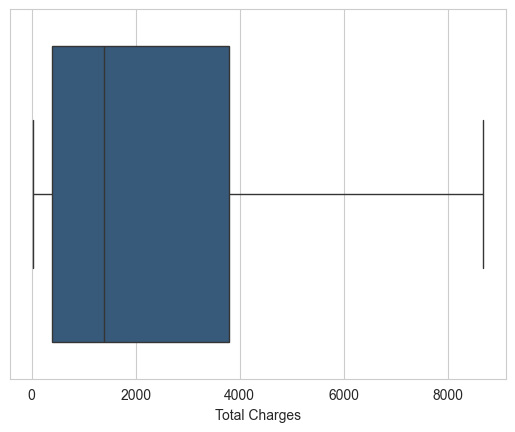

In [42]:
# Box Plot for 'Total Charges'
sns.boxplot(data = df, x = 'Total Charges')
plt.show()

This distribution is also not showing any outliers. Although the values are much larger than any other values seen. We did perform tests in scaling this column (using standard scaling) but it had no effect on the performance of the models hence, we decided not to scale this column

In [43]:
# Decribe all the columns
df.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
count,7032,7032.0,7032,7032,7032,7032.000000,7032,7032.000000,7032.000000,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032,7032.000000,7032
unique,7032,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2,NaN,21
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,Not Churned
freq,1,NaN,7032,7032,304,NaN,5,NaN,NaN,3549,5890,3639,5412,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163,NaN,5163
mean,NaN,1.0,NaN,NaN,NaN,93523.032565,NaN,36.283307,-119.799215,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN,0.265785,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.515958,NaN,2.456118,2.157588,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN,0.441782,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN,0.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.500000,NaN,36.391777,-119.735410,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,0.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95354.000000,NaN,38.227285,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN,1.000000,NaN


In [44]:
# Feature engineering function

def feature_engineering(df):
    df = df.copy()
    
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Senior Citizen'] = df['Senior Citizen'].map({'Yes':1, 'No':0})
    df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
    df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
    df['Phone Service'] = df['Phone Service'].map({'Yes':1, 'No':0})
    df['Paperless Billing'] = df['Paperless Billing'].map({'Yes':1, 'No':0})
    
    df = pd.get_dummies(df, columns = ['Multiple Lines'], drop_first = True, prefix = 'ML', dtype=int)
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'IS', dtype=int)
    df = pd.get_dummies(df, columns = ['Online Security'], drop_first = True, prefix = 'OS', dtype=int)
    df = pd.get_dummies(df, columns = ['Online Backup'], drop_first = True, prefix = 'OB', dtype=int)
    df = pd.get_dummies(df, columns = ['Device Protection'], drop_first = True, prefix = 'DP', dtype=int)
    df = pd.get_dummies(df, columns = ['Tech Support'], drop_first = True, prefix = 'TS', dtype=int)
    df = pd.get_dummies(df, columns = ['Streaming TV'], drop_first = True, prefix = 'STV', dtype=int)
    df = pd.get_dummies(df, columns = ['Streaming Movies'], drop_first = True, prefix = 'SM', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Con', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'PM', dtype=int)
   
    return df


# 6. Train Test Split

In [45]:
# checking for the df columns
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [46]:
# List of feature columns

features = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']

In [47]:
# Create X and y. For train test split

X = df[features]
y = df['Churn Value']

In [48]:
X.head(2)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [49]:
# Train - Test - Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
# Feature Engg to the train data
X_train_fe = feature_engineering(X_train)

In [51]:
# Check few columns for X_train_fe
X_train_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
3944,0,1,1,1,65,1,1,103.90,6767.10,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0
3393,1,1,0,0,56,1,1,101.05,5594.00,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1630,1,0,0,0,4,0,1,29.65,118.50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4086,0,0,0,0,18,1,1,60.60,1156.35,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1881,1,0,0,0,71,1,0,106.70,7382.25,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [52]:
len(X) == len(y)

True

# 7. Logistic Regression - Model 1

In [53]:
# Create a LogisticRegression() object.
lr = LogisticRegression(max_iter=1500, random_state=42)

In [54]:
# Fit the model on our data
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [55]:
# Make our prediction and Let's store them in 2 columns then, called 'prob_nonChurn' and 'prob_Churn'
X_train_fe[['prob_nonChurn', 'prob_Churn']] = lr.predict_proba(X_train_fe)

In [56]:
## Set that if prob_Churn > .5 then 0; else 1
X_train_fe['y_pred'] = np.where(X_train_fe['prob_Churn']>.5, 1, 0)

In [57]:
# Check few rows
X_train_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
3944,0,1,1,1,65,1,1,103.90,6767.10,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0.930751,0.069249,0
3393,1,1,0,0,56,1,1,101.05,5594.00,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0.501451,0.498549,0
1630,1,0,0,0,4,0,1,29.65,118.50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.358485,0.641515,1
4086,0,0,0,0,18,1,1,60.60,1156.35,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.706741,0.293259,0
1881,1,0,0,0,71,1,0,106.70,7382.25,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.942358,0.057642,0


### --Evaluate performace for Model 1

In [58]:
## The 'metrics' module from sklearn covers all of them (and more!) So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for the Churning predictions is:")
    print(metrics.confusion_matrix(predicted, actual), "\n")
    print(f'The accuracy of the Churning prediction model is: {metrics.accuracy_score(predicted, actual)}')
    print(f'The recall of the Churning prediction model is: {metrics.recall_score(predicted, actual)}')
    print(f'The precision of the Churning prediction model is: {metrics.precision_score(predicted, actual)}')
    print(f'The F1-score of the Churning prediction model is: {metrics.f1_score(predicted, actual)}')

In [59]:
## Now, we simply apply the function on our predictions
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for the Churning predictions is:
[[3280  561]
 [ 361  720]] 

The accuracy of the Churning prediction model is: 0.8126777732629012
The recall of the Churning prediction model is: 0.666049953746531
The precision of the Churning prediction model is: 0.5620608899297423
The F1-score of the Churning prediction model is: 0.6096528365791702


In [60]:
# Check the classification report
print(metrics.classification_report(y_train, X_train_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3641
           1       0.67      0.56      0.61      1281

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.81      0.81      0.81      4922



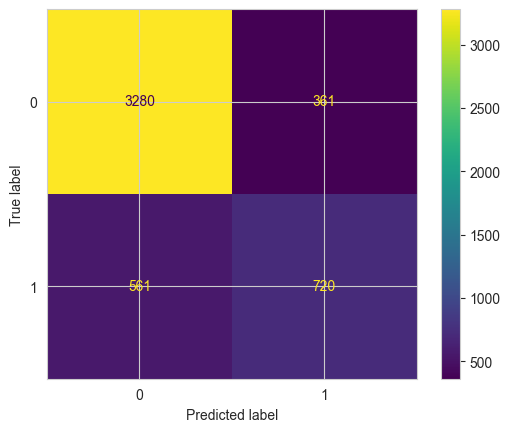

In [61]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_train, X_train_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

### Checking the metrics with different threshold values on the training data for Model 1
#### Results
* threshold of 0.4: accuracy = 0.80, precision = 0.88, recall = 0.85, f1 = 0.86, CM = 3531(TP), 490(FP), 620(FN), 984(TN)
* threshold of 0.5: accuracy = 0.81, precision = 0.86, recall = 0.90, f1 = 0.88, CM = 3729(TP), 622(FP), 422(FN), 852(TN)
* threshold of 0.6: accuracy = 0.81, precision = 0.82, recall = 0.94, f1 = 0.88, CM = 3897(TP), 840(FP), 254(FN), 634(TN)
* threshold of 0.7: accuracy = 0.78, precision = 0.79, recall = 0.97, f1 = 0.87, CM = 4036(TP), 1089(FP), 115(FN), 385(TN)
* threshold of 0.8: accuracy = 0.74, precision = 0.74, recall = 0.99, f1 = 0.85, CM = 4142(TP), 1413(FP), 9(FN), 61(TN)
* threshold of 0.9: accuracy = 0.74, precision = 0.74, recall = 1, f1 = 0.85, CM = 4151(TP), 1474(FP), 0(FN), 0(TN)

### --Working on the test data with Model 1

In [62]:
# Feature Engg to the test data
X_test_fe = feature_engineering(X_test)

In [63]:
# Make our prediction and Let's store them in 2 columns then, called 'prob_nonChurn' and 'prob_Churn'
X_test_fe[['prob_nonChurn', 'prob_Churn']] = lr.predict_proba(X_test_fe)

In [64]:
# Set that if prob_Churn > .5 then 0; else 1
X_test_fe['y_pred'] = np.where(X_test_fe['prob_Churn']>.5, 1, 0)

In [65]:
# Check few rows
X_test_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
2478,0,0,1,0,42,1,0,25.25,1108.20,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0.978930,0.021070,0
6783,1,0,0,0,43,0,0,44.15,1931.30,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0.918017,0.081983,0
6125,0,0,0,0,27,1,1,89.20,2383.60,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0.514209,0.485791,0
3052,1,0,0,0,65,1,1,19.55,1218.65,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0.997180,0.002820,0
4097,0,0,0,0,29,1,1,71.00,2080.10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0.794895,0.205105,0


In [66]:
## Now, we simply apply the function on our predictions
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for the Churning predictions is:
[[1378  239]
 [ 144  349]] 

The accuracy of the Churning prediction model is: 0.8184834123222748
The recall of the Churning prediction model is: 0.7079107505070994
The precision of the Churning prediction model is: 0.5935374149659864
The F1-score of the Churning prediction model is: 0.6456984273820536


In [67]:
# Check the classification report
print(metrics.classification_report(y_test, X_test_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1522
           1       0.71      0.59      0.65       588

    accuracy                           0.82      2110
   macro avg       0.78      0.75      0.76      2110
weighted avg       0.81      0.82      0.81      2110



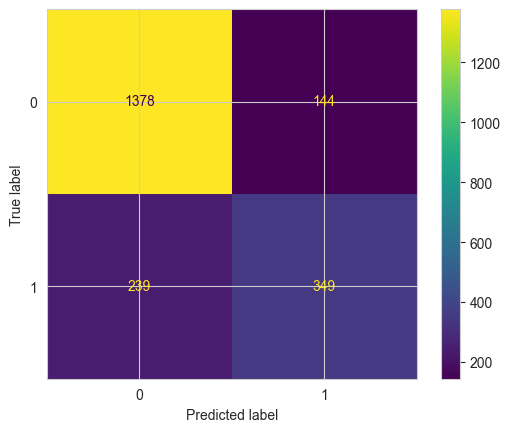

In [68]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_test, X_test_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

### Checking the metrics with different threshold values on the test data for Model 1
#### Results

* threshold of 0.6: accuracy = 0.81, precision = 0.81, recall = 0.95, f1 = 0.88, CM = 962(TP), 220(FP), 50(FN), 175(TN)
* threshold of 0.7: accuracy = 0.78, precision = 0.77, recall = 0.99, f1 = 0.87, CM = 998(TP), 292(FP), 14(FN), 103(TN)

# 8. Variance Inflation Factor - Model 2

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'ML_No phone service', 'ML_Yes',
       'IS_Fiber optic', 'IS_No', 'OS_No internet service', 'OS_Yes',
       'OB_No internet service', 'OB_Yes', 'DP_No internet service', 'DP_Yes',
       'TS_No internet service', 'TS_Yes', 'STV_No internet service',
       'STV_Yes', 'SM_No internet service', 'SM_Yes', 'Con_One year',
       'Con_Two year', 'PM_Credit card (automatic)', 'PM_Electronic check',
       'PM_Mailed check']

## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)


C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered

Gender                           1.003990
Senior Citizen                   1.134281
Partner                          1.360087
Dependents                       1.257734
Tenure Months                    7.666039
Phone Service                 1784.672491
Paperless Billing                1.201359
Monthly Charges                875.865627
Total Charges                   10.759949
ML_No phone service             61.194884
ML_Yes                           7.331617
IS_Fiber optic                 149.295300
IS_No                                 inf
OS_No internet service                inf
OS_Yes                           6.386863
OB_No internet service                inf
OB_Yes                           6.760259
DP_No internet service                inf
DP_Yes                           7.048332
TS_No internet service                inf
TS_Yes                           6.516445
STV_No internet service               inf
STV_Yes                         24.322707
SM_No internet service            

In [70]:
## This a piece of code from stats.stackexchange.com
## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [71]:
# Calculating the VIF
calculate_vif(X_train_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'ML_No phone service', 'ML_Yes',
       'IS_Fiber optic', 'IS_No', 'OS_No internet service', 'OS_Yes',
       'OB_No internet service', 'OB_Yes', 'DP_No internet service', 'DP_Yes',
       'TS_No internet service', 'TS_Yes', 'STV_No internet service',
       'STV_Yes', 'SM_No internet service', 'SM_Yes', 'Con_One year',
       'Con_Two year', 'PM_Credit card (automatic)', 'PM_Electronic check',
       'PM_Mailed check']])

C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'IS_No' at index: 12
dropping 'OS_No internet service' at index: 12
dropping 'OB_No internet service' at index: 13
dropping 'DP_No internet service' at index: 14
dropping 'TS_No internet service' at index: 15
dropping 'STV_No internet service' at index: 16
dropping 'Phone Service' at index: 5
dropping 'Monthly Charges' at index: 6
dropping 'Total Charges' at index: 6
dropping 'Tenure Months' at index: 4
Remaining variables:
Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check'],
      dtype='object')


,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,ML_No phone service,ML_Yes,IS_Fiber optic,OS_Yes,OB_Yes,DP_Yes,TS_Yes,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
3944,0,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0
3393,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0
1630,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4086,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1881,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0
5199,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0
5234,1,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0
5398,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
# Features selection for train & test data for VIF model
vif_features = X_train_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check']].copy()

vif_features_test = X_test_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check']].copy()

In [73]:
# Create a LogisticRegression() object.
lr2 = LogisticRegression(max_iter=1050, random_state=42)

In [74]:
# Fit the model on our data
lr2.fit(vif_features, y_train)

LogisticRegression(max_iter=1050, random_state=42)

In [75]:
# Make our prediction and Let's store them in 2 columns then, called 'prob_nonChurn' and 'prob_Churn'
vif_features[['prob_nonChurn', 'prob_Churn']] = lr2.predict_proba(vif_features)

In [76]:
## Set that if prob_Churn > .5 then 0; else 1
vif_features['y_pred'] = np.where(vif_features['prob_Churn']>.5, 1, 0)

In [77]:
# Check few rows
vif_features.head()

,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,ML_No phone service,ML_Yes,IS_Fiber optic,OS_Yes,OB_Yes,DP_Yes,TS_Yes,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
3944,0,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0.927257,0.072743,0
3393,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0.299312,0.700688,1
1630,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.481350,0.518650,1
4086,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0.684242,0.315758,0
1881,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0.936449,0.063551,0


In [78]:
## Now, we simply apply the function on our predictions
get_results(y_train, vif_features['y_pred'])

The confusion matrix for the Churning predictions is:
[[3234  584]
 [ 407  697]] 

The accuracy of the Churning prediction model is: 0.7986590816741163
The recall of the Churning prediction model is: 0.6313405797101449
The precision of the Churning prediction model is: 0.5441061670569868
The F1-score of the Churning prediction model is: 0.5844863731656185


In [79]:
# Check the classification report
print(metrics.classification_report(y_train, vif_features['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3641
           1       0.63      0.54      0.58      1281

    accuracy                           0.80      4922
   macro avg       0.74      0.72      0.73      4922
weighted avg       0.79      0.80      0.79      4922



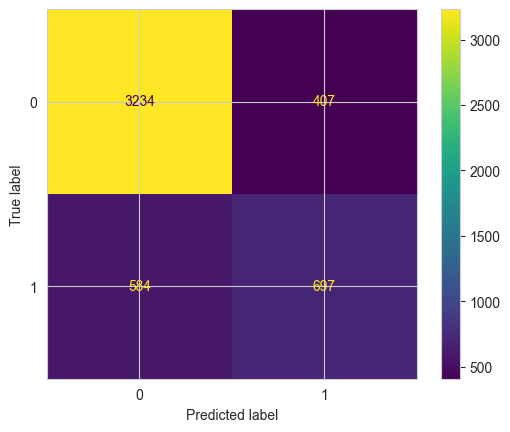

In [80]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_train, vif_features['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

### --Working on the test data with Model 2

In [81]:
# Make our prediction and Let's store them in 2 columns then, called 'prob_nonChurn' and 'prob_Churn'
vif_features_test[['prob_nonChurn', 'prob_Churn']] = lr2.predict_proba(vif_features_test)

In [82]:
## Set that if prob_Churn > .5 then 0; else 1
vif_features_test['y_pred'] = np.where(vif_features_test['prob_Churn']>.5, 1, 0)

In [83]:
# Check few rows
vif_features_test.head()

,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,ML_No phone service,ML_Yes,IS_Fiber optic,OS_Yes,OB_Yes,DP_Yes,TS_Yes,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
2478,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.966673,0.033327,0
6783,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0.847449,0.152551,0
6125,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0.394665,0.605335,1
3052,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.976327,0.023673,0
4097,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0.825899,0.174101,0


In [84]:
## Now, we simply apply the function on our predictions
get_results(y_test, vif_features_test['y_pred'])

The confusion matrix for the Churning predictions is:
[[1333  250]
 [ 189  338]] 

The accuracy of the Churning prediction model is: 0.7919431279620853
The recall of the Churning prediction model is: 0.6413662239089184
The precision of the Churning prediction model is: 0.5748299319727891
The F1-score of the Churning prediction model is: 0.6062780269058295


In [85]:
# Check the classification report
print(metrics.classification_report(y_test, vif_features_test['y_pred']))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1522
           1       0.64      0.57      0.61       588

    accuracy                           0.79      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



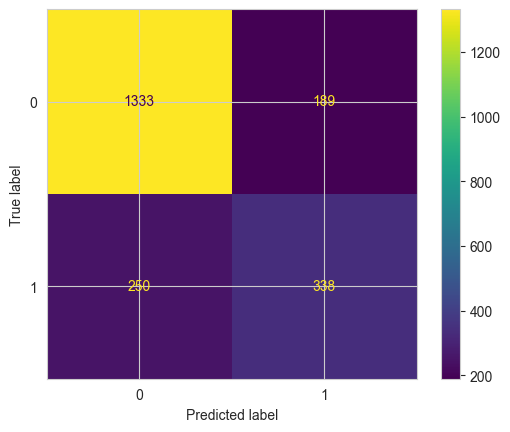

In [86]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_test, vif_features_test['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# 9. Stepwise - Model 3

In [87]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


       
        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [88]:
X_train_fe.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'IS_No', 'OS_No internet service', 'OS_Yes', 'OB_No internet service',
       'OB_Yes', 'DP_No internet service', 'DP_Yes', 'TS_No internet service',
       'TS_Yes', 'STV_No internet service', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check',
       'prob_nonChurn', 'prob_Churn', 'y_pred'],
      dtype='object')

In [89]:
# Working for columns through stepwise
resultSW = stepwise_selection(X_train_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'ML_No phone service', 'ML_Yes',
       'IS_Fiber optic', 'IS_No', 'OS_No internet service', 'OS_Yes',
       'OB_No internet service', 'OB_Yes', 'DP_No internet service', 'DP_Yes',
       'TS_No internet service', 'TS_Yes', 'STV_No internet service',
       'STV_Yes', 'SM_No internet service', 'SM_Yes', 'Con_One year',
       'Con_Two year', 'PM_Credit card (automatic)', 'PM_Electronic check',
       'PM_Mailed check']], y_train, threshold_in = 0.01, threshold_out = 0.05, verbose = True)

print('resulting features:')
print(resultSW)

Add  Tenure Months                  with p-value 4.15951e-139
Add  IS_Fiber optic                 with p-value 9.9932e-124
Add  Dependents                     with p-value 6.1732e-33
Add  PM_Electronic check            with p-value 6.88172e-23
Add  Paperless Billing              with p-value 2.0971e-11
Add  Con_One year                   with p-value 6.76764e-10
Add  Con_Two year                   with p-value 8.53312e-07
Add  OS_No internet service         with p-value 0.000328121
Add  OS_Yes                         with p-value 2.63233e-08
Add  TS_No internet service         with p-value 1.77773e-08
Add  STV_No internet service        with p-value 1.77773e-08
Add  DP_No internet service         with p-value 1.77773e-08
Add  SM_No internet service         with p-value 1.77773e-08
Add  OB_No internet service         with p-value 1.77773e-08
Add  IS_No                          with p-value 1.77773e-08
Add  Total Charges                  with p-value 8.18667e-06
Add  SM_Yes              

In [90]:
# Selecting columns columns as per Stepwise for the model
stepwise_features = X_train_fe[['Tenure Months', 'IS_Fiber optic', 'Dependents', 'PM_Electronic check', 
                     'Con_One year', 'Paperless Billing', 'Con_Two year', 'IS_No', 'Total Charges', 
                     'OB_No internet service', 'DP_No internet service', 'STV_No internet service', 
                     'OS_No internet service', 'SM_No internet service', 'TS_No internet service', 
                     'OS_Yes', 'SM_Yes', 'ML_Yes', 'Partner', 'TS_Yes', 'STV_Yes']].copy()

stepwise_features_test = X_test_fe[['Tenure Months', 'IS_Fiber optic', 'Dependents', 'PM_Electronic check', 
                     'Con_One year', 'Paperless Billing', 'Con_Two year', 'IS_No', 'Total Charges', 
                     'OB_No internet service', 'DP_No internet service', 'STV_No internet service', 
                     'OS_No internet service', 'SM_No internet service', 'TS_No internet service', 
                     'OS_Yes', 'SM_Yes', 'ML_Yes', 'Partner', 'TS_Yes', 'STV_Yes']].copy()

In [91]:
# Create a LogisticRegression() object.
lr3 = LogisticRegression(max_iter=1050, random_state=42)

In [92]:
# Fit the model on our data
lr3.fit(stepwise_features, y_train)

LogisticRegression(max_iter=1050, random_state=42)

In [93]:
# Make our prediction and Let's store them in 2 columns then, called 'prob_nonChurn' and 'prob_Churn'
stepwise_features[['prob_nonChurn', 'prob_Churn']] = lr3.predict_proba(stepwise_features)

In [94]:
## Set that if prob_Churn > .5 then 0; else 1
stepwise_features['y_pred'] = np.where(stepwise_features['prob_Churn']>.6, 1, 0)

In [95]:
# Check few rows
stepwise_features.head()

,Tenure Months,IS_Fiber optic,Dependents,PM_Electronic check,Con_One year,Paperless Billing,Con_Two year,IS_No,Total Charges,OB_No internet service,DP_No internet service,STV_No internet service,OS_No internet service,SM_No internet service,TS_No internet service,OS_Yes,SM_Yes,ML_Yes,Partner,TS_Yes,STV_Yes,prob_nonChurn,prob_Churn,y_pred
3944,65,1,1,0,1,1,0,0,6767.10,0,0,0,0,0,0,0,1,1,1,1,1,0.946944,0.053056,0
3393,56,1,0,1,0,1,0,0,5594.00,0,0,0,0,0,0,0,1,1,0,0,1,0.531674,0.468326,0
1630,4,0,0,1,0,1,0,0,118.50,0,0,0,0,0,0,0,0,0,0,0,0,0.443025,0.556975,0
4086,18,0,0,0,0,1,0,0,1156.35,0,0,0,0,0,0,1,0,1,0,0,0,0.706674,0.293326,0
1881,71,1,0,0,0,0,1,0,7382.25,0,0,0,0,0,0,1,1,1,0,0,1,0.954430,0.045570,0


In [96]:
## Now, we simply apply the function on our predictions
get_results(y_train, stepwise_features['y_pred'])

The confusion matrix for the Churning predictions is:
[[3438  766]
 [ 203  515]] 

The accuracy of the Churning prediction model is: 0.8031288094270622
The recall of the Churning prediction model is: 0.7172701949860725
The precision of the Churning prediction model is: 0.4020296643247463
The F1-score of the Churning prediction model is: 0.5152576288144072


In [97]:
# Check the classification report
print(metrics.classification_report(y_train, stepwise_features['y_pred']))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3641
           1       0.72      0.40      0.52      1281

    accuracy                           0.80      4922
   macro avg       0.77      0.67      0.70      4922
weighted avg       0.79      0.80      0.78      4922



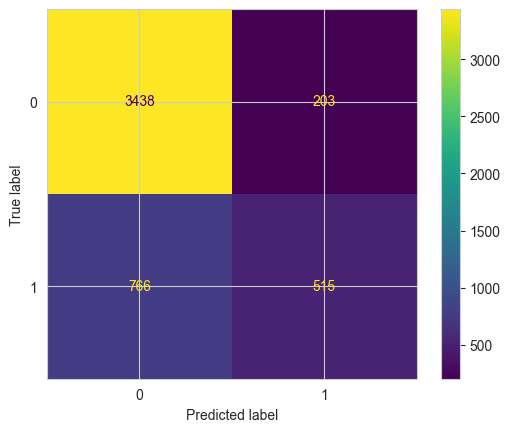

In [98]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_train, stepwise_features['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

### --Working on the test data with Model 3

In [99]:
# Make our prediction and Let's store them in 2 columns then, called 'prob_nonChurn' and 'prob_Churn'
stepwise_features_test[['prob_nonChurn', 'prob_Churn']] = lr3.predict_proba(stepwise_features_test)

In [100]:
## Set that if prob_Churn > .5 then 0; else 1
stepwise_features_test['y_pred'] = np.where(stepwise_features_test['prob_Churn']>.6, 1, 0)

In [101]:
# Check few rows
stepwise_features_test.head()

,Tenure Months,IS_Fiber optic,Dependents,PM_Electronic check,Con_One year,Paperless Billing,Con_Two year,IS_No,Total Charges,OB_No internet service,DP_No internet service,STV_No internet service,OS_No internet service,SM_No internet service,TS_No internet service,OS_Yes,SM_Yes,ML_Yes,Partner,TS_Yes,STV_Yes,prob_nonChurn,prob_Churn,y_pred
2478,42,0,0,1,0,0,1,1,1108.20,1,1,1,1,1,1,0,0,1,1,0,0,0.977363,0.022637,0
6783,43,0,0,1,1,0,0,0,1931.30,0,0,0,0,0,0,0,1,0,0,1,0,0.937158,0.062842,0
6125,27,1,0,1,0,1,0,0,2383.60,0,0,0,0,0,0,0,1,0,0,1,0,0.512624,0.487376,0
3052,65,0,0,0,0,1,1,1,1218.65,1,1,1,1,1,1,0,0,0,0,0,0,0.996100,0.003900,0
4097,29,0,0,0,1,1,0,0,2080.10,0,0,0,0,0,0,0,1,1,0,0,1,0.756065,0.243935,0


In [102]:
## Now, we simply apply the function on our predictions
get_results(y_test, stepwise_features_test['y_pred'])

The confusion matrix for the Churning predictions is:
[[1448  347]
 [  74  241]] 

The accuracy of the Churning prediction model is: 0.8004739336492891
The recall of the Churning prediction model is: 0.765079365079365
The precision of the Churning prediction model is: 0.4098639455782313
The F1-score of the Churning prediction model is: 0.5337763012181617


In [103]:
# Check the classification report
print(metrics.classification_report(y_test, stepwise_features_test['y_pred']))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1522
           1       0.77      0.41      0.53       588

    accuracy                           0.80      2110
   macro avg       0.79      0.68      0.70      2110
weighted avg       0.80      0.80      0.78      2110



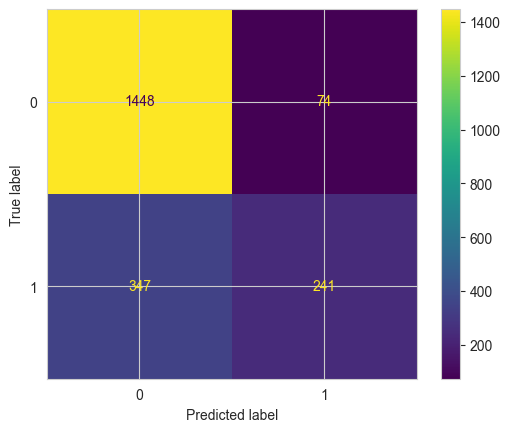

In [104]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_test, stepwise_features_test['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# **Out of all the Models we have worked on, we have selected Model 3 as it gave us the best metric.**

# 10. Top 500 Customers likely to Churn

Creating a list in a CSV file of 500 customers who are most likely to churn from a dataframe which consists only the customers who have not Churned yet!

In [105]:
# Dataframe consisting only the customers who have not churned yet
df_nonchurners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [106]:
# Checking the nulls for the Total Charges column
rows_with_nan = df_nonchurners[(df_nonchurners['Total Charges'] == ' ')]
rows_with_nan 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0,NaN


In [107]:
# Checking the shape of the dataframe
df_nonchurners.shape

(5174, 31)

In [108]:
# Delete rows with space as a value in any column
df_nonchurners = df_nonchurners[df_nonchurners['Total Charges'].astype(str).str.strip() != '']

In [109]:
# Checking the shape of the dataframe after deleting the data
df_nonchurners.shape

(5163, 31)

In [110]:
# Checking the values for Total Charges column
df_nonchurners['Total Charges'].value_counts()

Total Charges
19.75      7
19.65      6
19.55      6
20.05      6
20.45      5
          ..
2117.20    1
203.95     1
6849.40    1
85.50      1
6844.50    1
Name: count, Length: 4965, dtype: int64

In [111]:
# Creating a list of feature engineering columns
fe_cols = ['CustomerID','Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']

In [112]:
# Apply feature engineering to this dataset
X_df_nonchurners = df_nonchurners[fe_cols]
df_nonchurners_fe = feature_engineering(X_df_nonchurners)
df_nonchurners_fe.head()


,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
1869,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1870,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1871,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1872,1452-KIOVK,1,0,0,1,22,1,1,89.10,1949.4,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1873,6713-OKOMC,0,0,0,0,10,0,0,29.75,301.9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [113]:
# Convert Total charges to numeric data type
df_nonchurners_fe['Total Charges'] = pd.to_numeric(df_nonchurners_fe['Total Charges'], errors='coerce')

In [114]:
# Checking the datatypes for the columns in dataframe
df_nonchurners_fe.dtypes

CustomerID                     object
Gender                          int64
Senior Citizen                  int64
Partner                         int64
Dependents                      int64
Tenure Months                   int64
Phone Service                   int64
Paperless Billing               int64
Monthly Charges               float64
Total Charges                 float64
ML_No phone service             int32
ML_Yes                          int32
IS_Fiber optic                  int32
IS_No                           int32
OS_No internet service          int32
OS_Yes                          int32
OB_No internet service          int32
OB_Yes                          int32
DP_No internet service          int32
DP_Yes                          int32
TS_No internet service          int32
TS_Yes                          int32
STV_No internet service         int32
STV_Yes                         int32
SM_No internet service          int32
SM_Yes                          int32
Con_One year

In [115]:
# Predicting the probabilities from the chosen Model 3
churn_prob = lr3.predict_proba(df_nonchurners_fe[['Tenure Months', 'IS_Fiber optic', 'Dependents', 'PM_Electronic check', 
                     'Con_One year', 'Paperless Billing', 'Con_Two year', 'IS_No', 'Total Charges', 
                     'OB_No internet service', 'DP_No internet service', 'STV_No internet service', 
                     'OS_No internet service', 'SM_No internet service', 'TS_No internet service', 
                     'OS_Yes', 'SM_Yes', 'ML_Yes', 'Partner', 'TS_Yes', 'STV_Yes']])[:, 1]

# Combine the customer ID and churn probability into a DataFrame
cust_churn_prob = pd.DataFrame({'CustomerID': df_nonchurners_fe['CustomerID'], 'churn_prob': churn_prob})

# Sort the customers in decreasing order of churn probability and select the top 500
top_500_cust = cust_churn_prob.sort_values(by='churn_prob', ascending=False).head(500)
top_500_cust.head()


,CustomerID,churn_prob
3732,4927-WWOOZ,0.814080
4624,3489-HHPFY,0.812372
3712,8622-ZLFKO,0.808627
4198,5150-ITWWB,0.803980
2567,6630-UJZMY,0.802201


In [116]:
# Exporting the top 500 customer list in a .csv file
top_500_cust.to_csv('top_500_customers.csv')

# 11. Remaining customers likely to Churn

Creating a list in a CSV file of reamaining customers who are most likely to churn from a dataframe which consists only the customers who have not Churned yet!

In [117]:
# Sort the customers in decreasing order of churn probability and select the customers beyond 500
cust_remaining = cust_churn_prob.sort_values(by='churn_prob', ascending=False).iloc[500:]
cust_remaining.head()

,CustomerID,churn_prob
4418,8950-MTZNV,0.503563
4463,8710-YGLWG,0.503559
5510,8180-AKMJV,0.503533
6214,0082-LDZUE,0.503514
3246,3961-SXAXY,0.503495


In [118]:
# List of remaining customers beyond 500 and exporting them to csv file
cust_remaining.to_csv('customers_remaining.csv')

---------------------------------------------------------------------------------------------------------------      END      ---------------------------------------------------------------------------------------------------------------